## Task: analyze forbidden bonds, certain Ti-O-C angles on: (i) crest conformers, (ii) xtb optimization steps (iii) DFT opt steps

### Setup

#### Import libraries

In [ ]:
#%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

In [1]:
import copy
from datetime import datetime
import json
import numpy as np
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union

import matplotlib
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = False
#matplotlib.rc('axes', edgecolor='grey')

import ase
import ase.io as ase_io
from ase import Atoms
from ase.visualize import view

#import warnings
#warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore", module = "matplotlib\..*" )

In [2]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
import constants as C
from dataset import Dataset
import datasets_collections as dc
import features as ft
import features_collections as fc
import utils as ut
import xyz_parser
import molecule_analyzer as A

#### Helper functions

In [3]:
def calculate_dataset_list(
                            dataset_list: List[Dataset],
                            features_list: List[ft.Feature]
                        ) -> List[Dict]:

    res = []

    for dset in dataset_list:
        dset_dict = {}
        dset_dict["dataset_description"] = dset.description
        dset_dict["dataset_sources"] = dset.names
        molecules = au.create_ase_atoms_list_from_dataset(dset)
        dset_dict["molecules"] = molecules
        dset_dict["molecules_names"] = [x.info["name"] for x in molecules]

        dset_dict["features_list"] = features_list
        dset_dict["features_info"] = [x.get_info(molecules[0]) for x in features_list]

        dset_dict["calc_by_features"] = A.calculate_values_groupby_features(
                                              molecules=molecules,
                                              features_list=features_list
                                              )
        res.append(dset_dict)

    return res


#### Define some constants

In [4]:
#colours = list(matplotlib.colors.TABLEAU_COLORS.values())
colours = ["red","royalblue","limegreen","saddlebrown","orange","cyan","yellow","black","grey"]

## Analysis: forbidden bond distances, Ti-O-C angles, etc

### 1. Define features of interest: bonds, angles, etc.

In [5]:
forbidden_bonds_list = fc.mol24_forbidden_bonds
tioc_angles_list = fc.mol24_constraints6_angles # contains more than ti-o-c

### 2. Define datasets

#### Define dataset(s) containing CREST conformers

In [6]:
# mol24 CREST conformers

mol24_ex5_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex5_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex5_gfnff_crest_conformers.xyz"), "mol24_ex5_gfnff_crest_conformers")])

mol24_ex8_gfn2_crest_conformers = Dataset.create_with_names(
  description="mol24_ex8_gfn2_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex8_gfn2_crest_conformers.xyz"), "mol24_ex8_gfn2_crest_conformers")])

mol24_ex10_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex10_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex10_gfnff_crest_conformers.xyz"), "mol24_ex10_gfnff_crest_conformers")])

mol24_ex15_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex15_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex15_gfnff_crest_conformers.xyz"), "mol24_ex15_gfnff_crest_conformers")])

mol24_ex16_gfn2_crest_conformers = Dataset.create_with_names(
  description="mol24_ex16_gfn2_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex16_gfn2_crest_conformers.xyz"), "mol24_ex16_gfn2_crest_conformers")])

crest_conformers_dataset_list = [
        mol24_ex5_gfnff_crest_conformers,
        mol24_ex8_gfn2_crest_conformers,
        mol24_ex10_gfnff_crest_conformers,
        mol24_ex15_gfnff_crest_conformers,
        mol24_ex16_gfn2_crest_conformers
    ]

crest_conformers_dataset_names = [x.description for x in crest_conformers_dataset_list]

crest_conformers_forbidden_distances_results = calculate_dataset_list(
                                                            dataset_list=crest_conformers_dataset_list,
                                                            features_list=forbidden_bonds_list
                                                            )

crest_conformers_tioc_angles_results = calculate_dataset_list(
                                                            dataset_list=crest_conformers_dataset_list,
                                                            features_list=tioc_angles_list
                                                            )


#### Define dataset(s) containing xtb optimization trajectories

In [7]:
mol24_ex17_gfn2_opt_steps = Dataset.create_with_names(
  description="mol24_ex17_gfn2_opt_steps",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex17_gfn2_opt_steps.xyz"), "mol24_ex17_gfn2_opt_steps")])

mol24_ex18_gfnff_opt_steps = Dataset.create_with_names(
  description="mol24_ex18_gfnff_opt_steps",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex18_gfnff_opt_steps.xyz"), "mol24_ex18_gfnff_opt_steps")])


xtb_opt_dataset_list = [
        mol24_ex17_gfn2_opt_steps,
        mol24_ex18_gfnff_opt_steps
    ]

xtb_opt_dataset_names = [x.description for x in xtb_opt_dataset_list]

xtb_opt_forbidden_distances_results = calculate_dataset_list(
                                dataset_list=xtb_opt_dataset_list,
                                features_list=forbidden_bonds_list
                                )

xtb_opt_tioc_angles_results = calculate_dataset_list(
                                dataset_list=xtb_opt_dataset_list,
                                features_list=tioc_angles_list
                                )


#### Define dataset(s) containing DFT optimization trajectories

In [8]:
dft_dataset_list = [
    dc.mol24_crest_reopt_gfn2_bp86_def2svpp_svpfit,
    dc.mol24_crest_reopt_gfnff_bp86_def2svpp_svpfit,
    dc.mol24_crest_reopt_gfn2_bp86_sto3g,
    dc.mol24_crest_reopt_gfnff_bp86_sto3g,
    dc.mol24_crest_reopt_gfn2_pbe1pbe_sto3g,
    dc.mol24_crest_reopt_gfn2_bp86_sto3g,
    ]

dft_dataset_names = [x.description for x in dft_dataset_list]

dft_forbidden_distances_results = calculate_dataset_list(
                                dataset_list=dft_dataset_list,
                                features_list=forbidden_bonds_list
                                )

dft_tioc_angles_results = calculate_dataset_list(
                                dataset_list=dft_dataset_list,
                                features_list=tioc_angles_list
                                )


### 3. Analysis of forbidden bonds

#### Plot forbidden bonds distances for CREST conformers

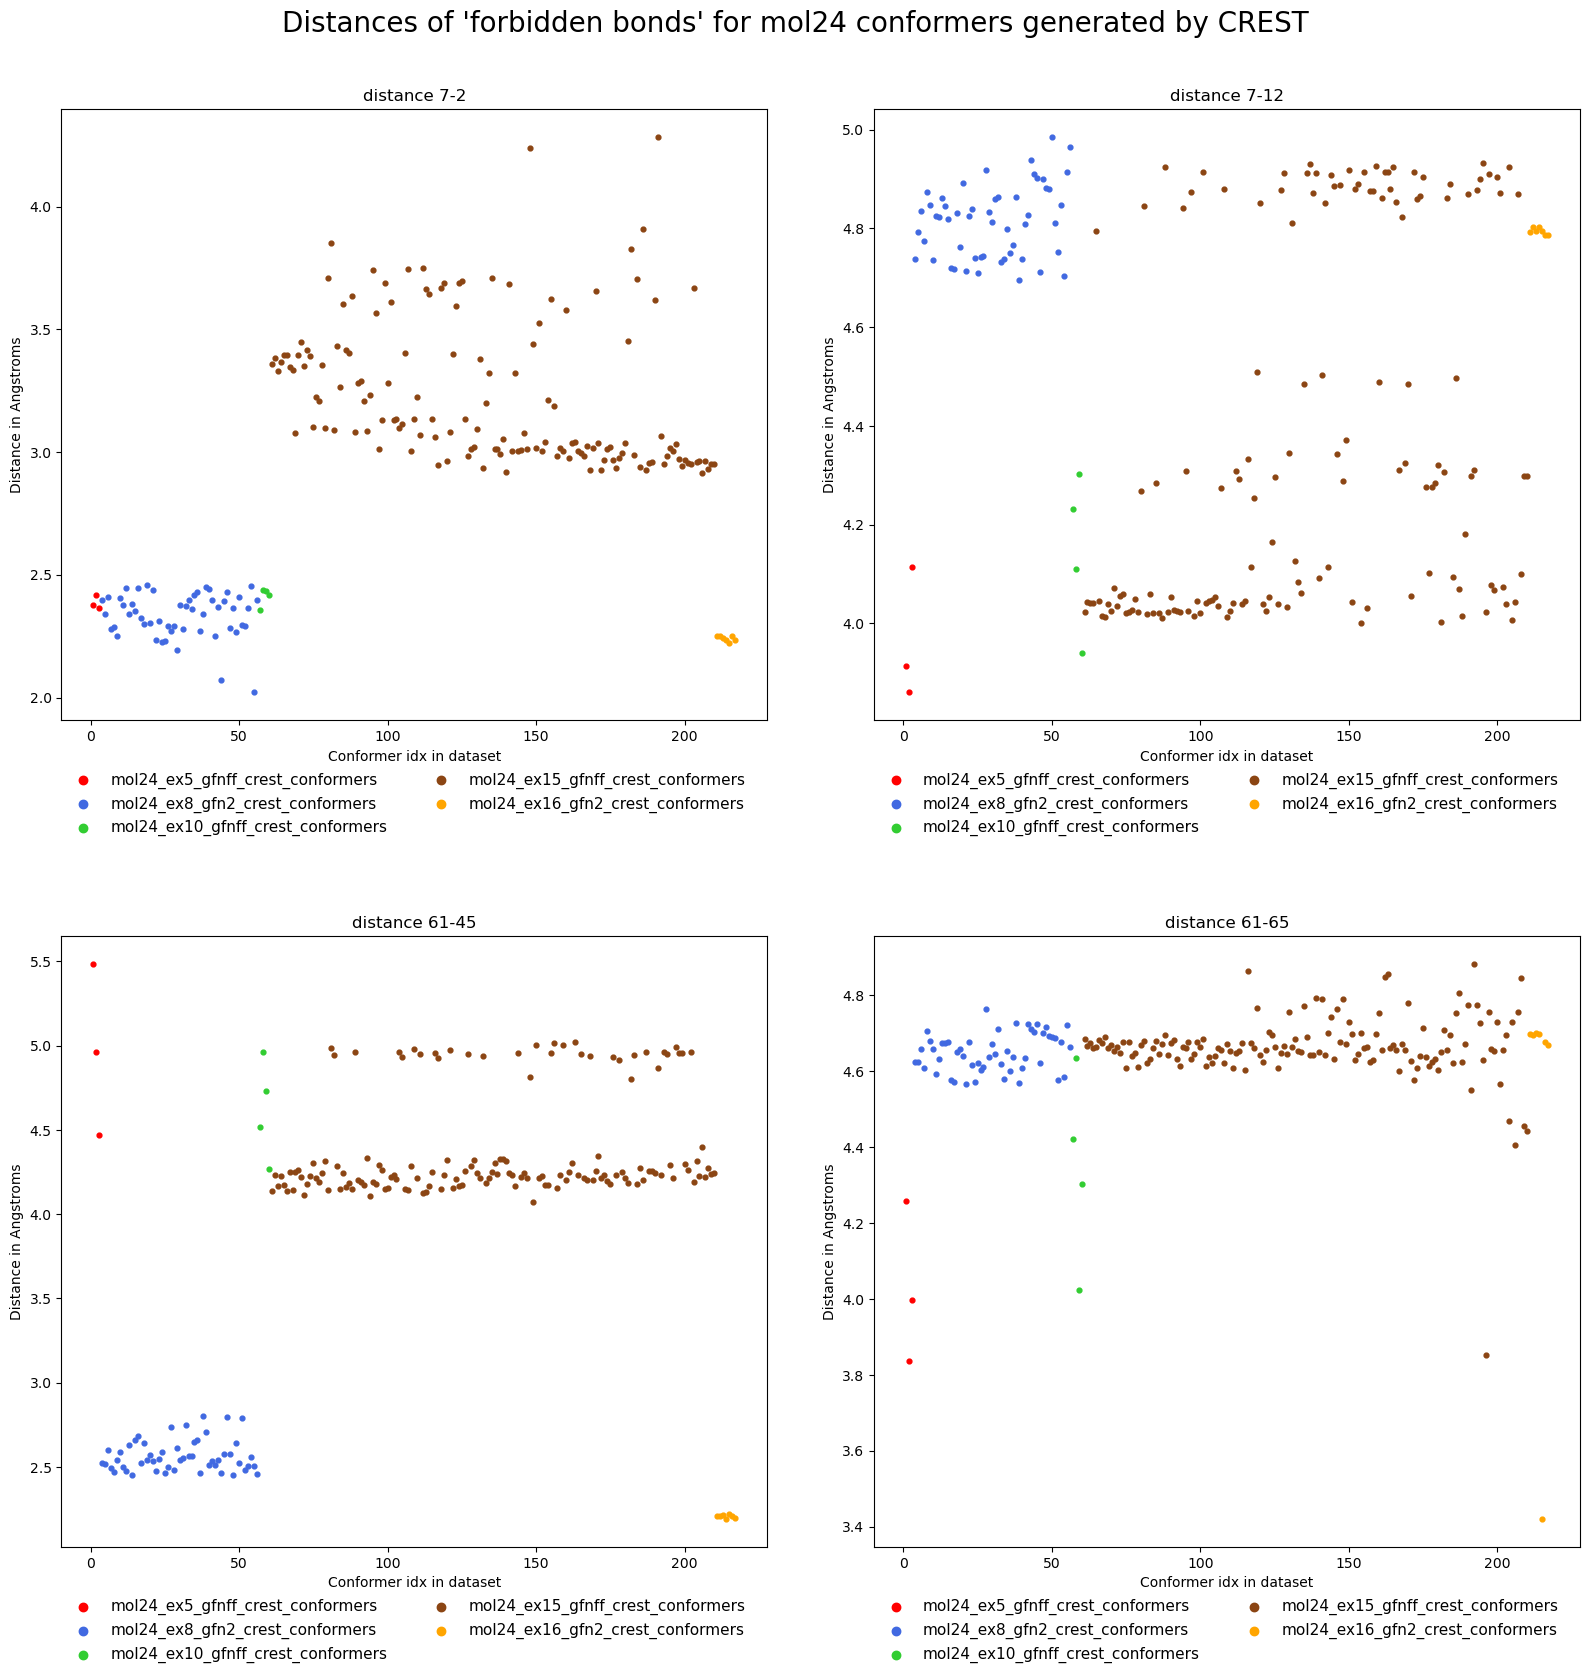

In [10]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = crest_conformers_forbidden_distances_results
dataset_names = crest_conformers_dataset_names
features_list = forbidden_bonds_list

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Distances of 'forbidden bonds' for mol24 conformers generated by CREST"
x_label = "Conformer idx in dataset"
y_label = "Distance in Angstroms"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.2), ncol=2, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()


#### Plot forbidden bonds distances for xtb optimization steps

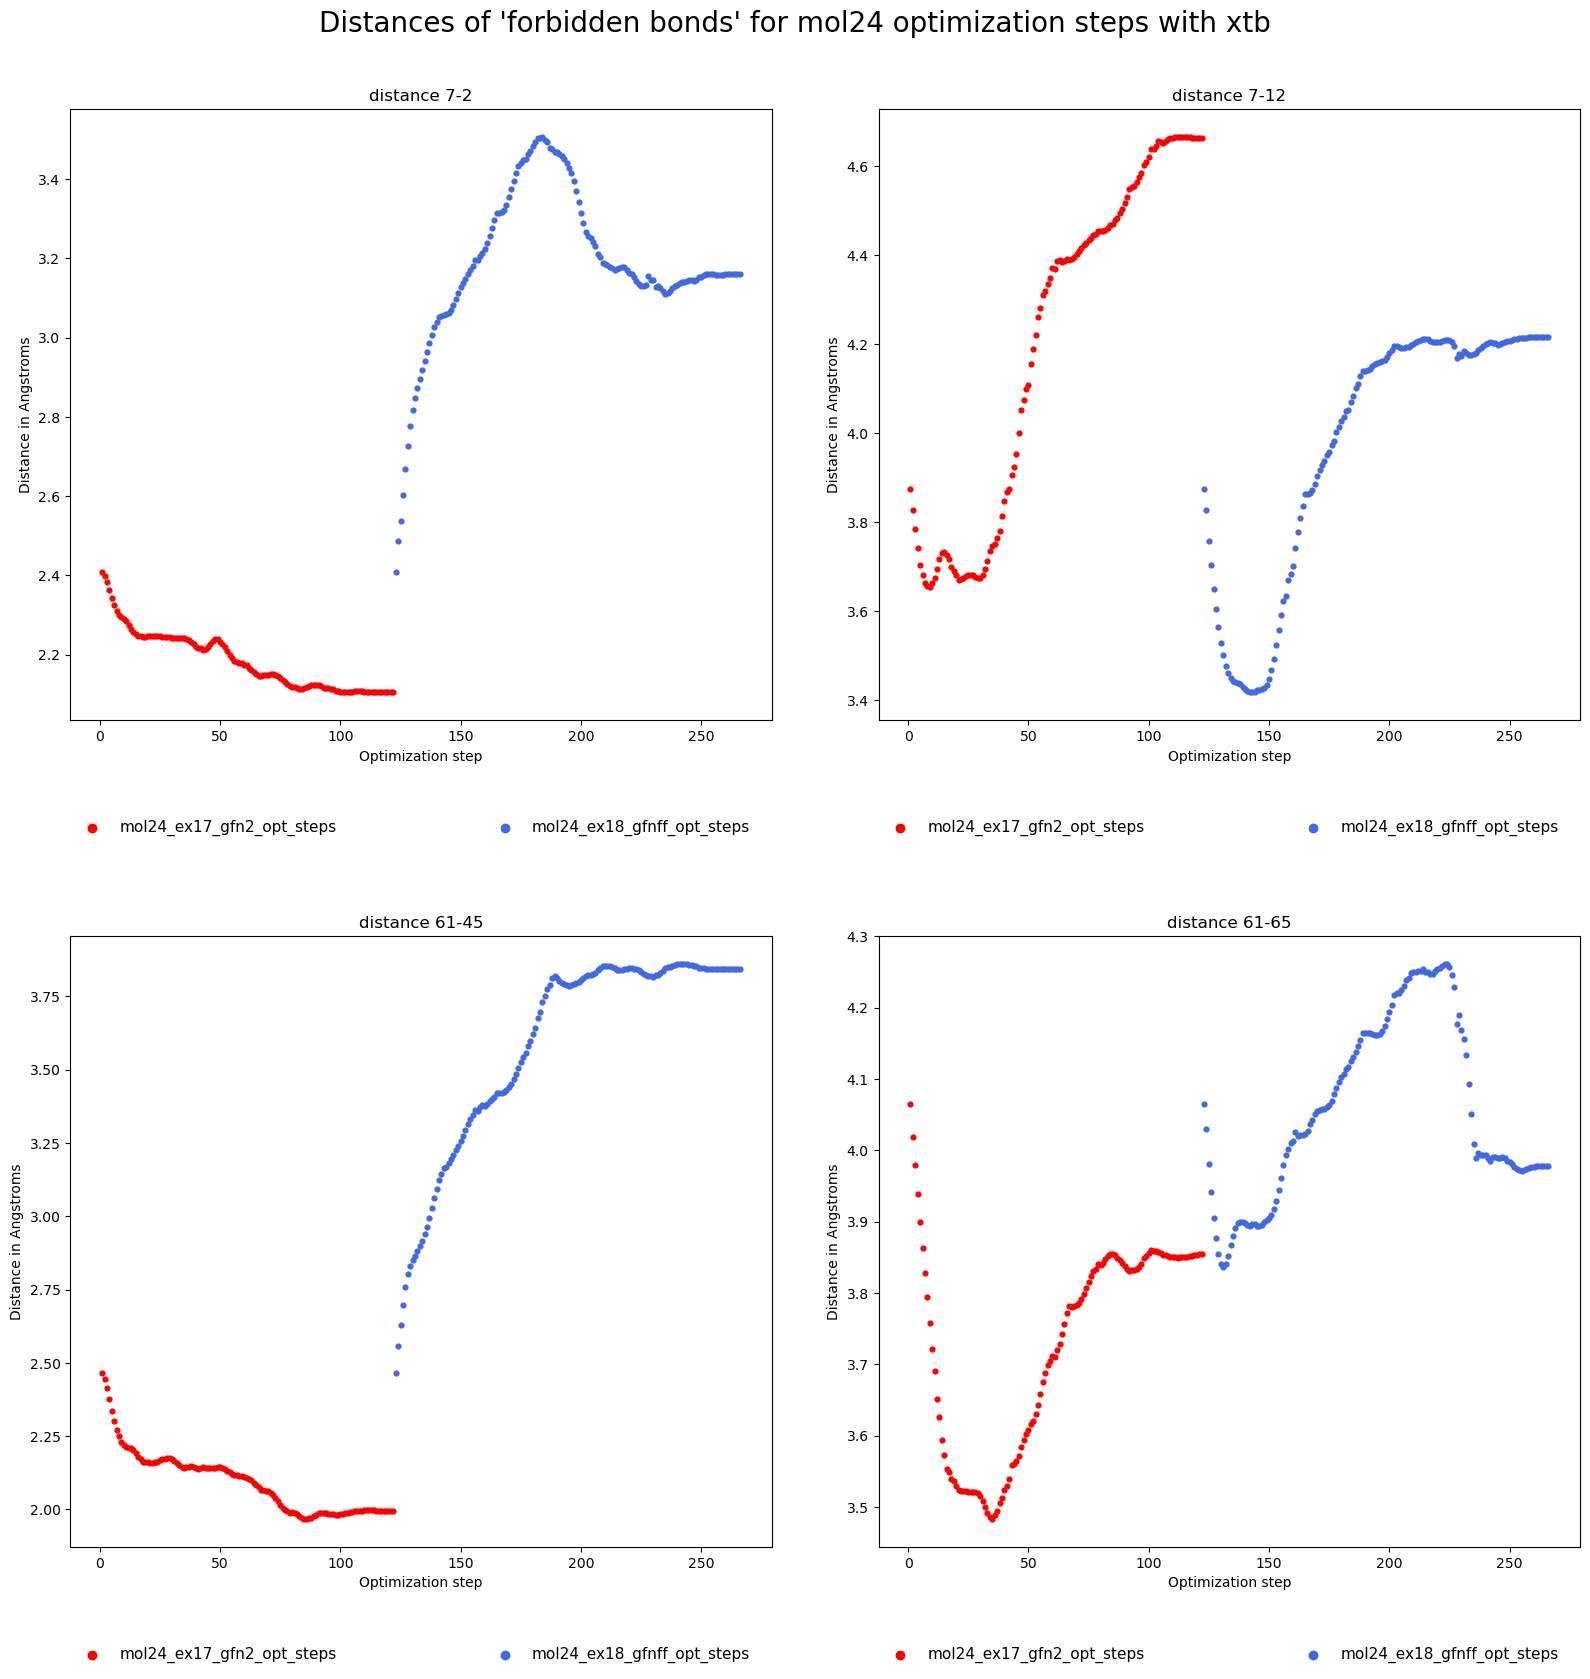

In [11]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = xtb_opt_forbidden_distances_results
dataset_names = xtb_opt_dataset_names
features_list = forbidden_bonds_list

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Distances of 'forbidden bonds' for mol24 optimization steps with xtb"
x_label = "Optimization step"
y_label = "Distance in Angstroms"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.2), ncol=2, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()

#### Plot forbidden bonds distances: DFT optimization steps, reoptimize CREST best with DFT

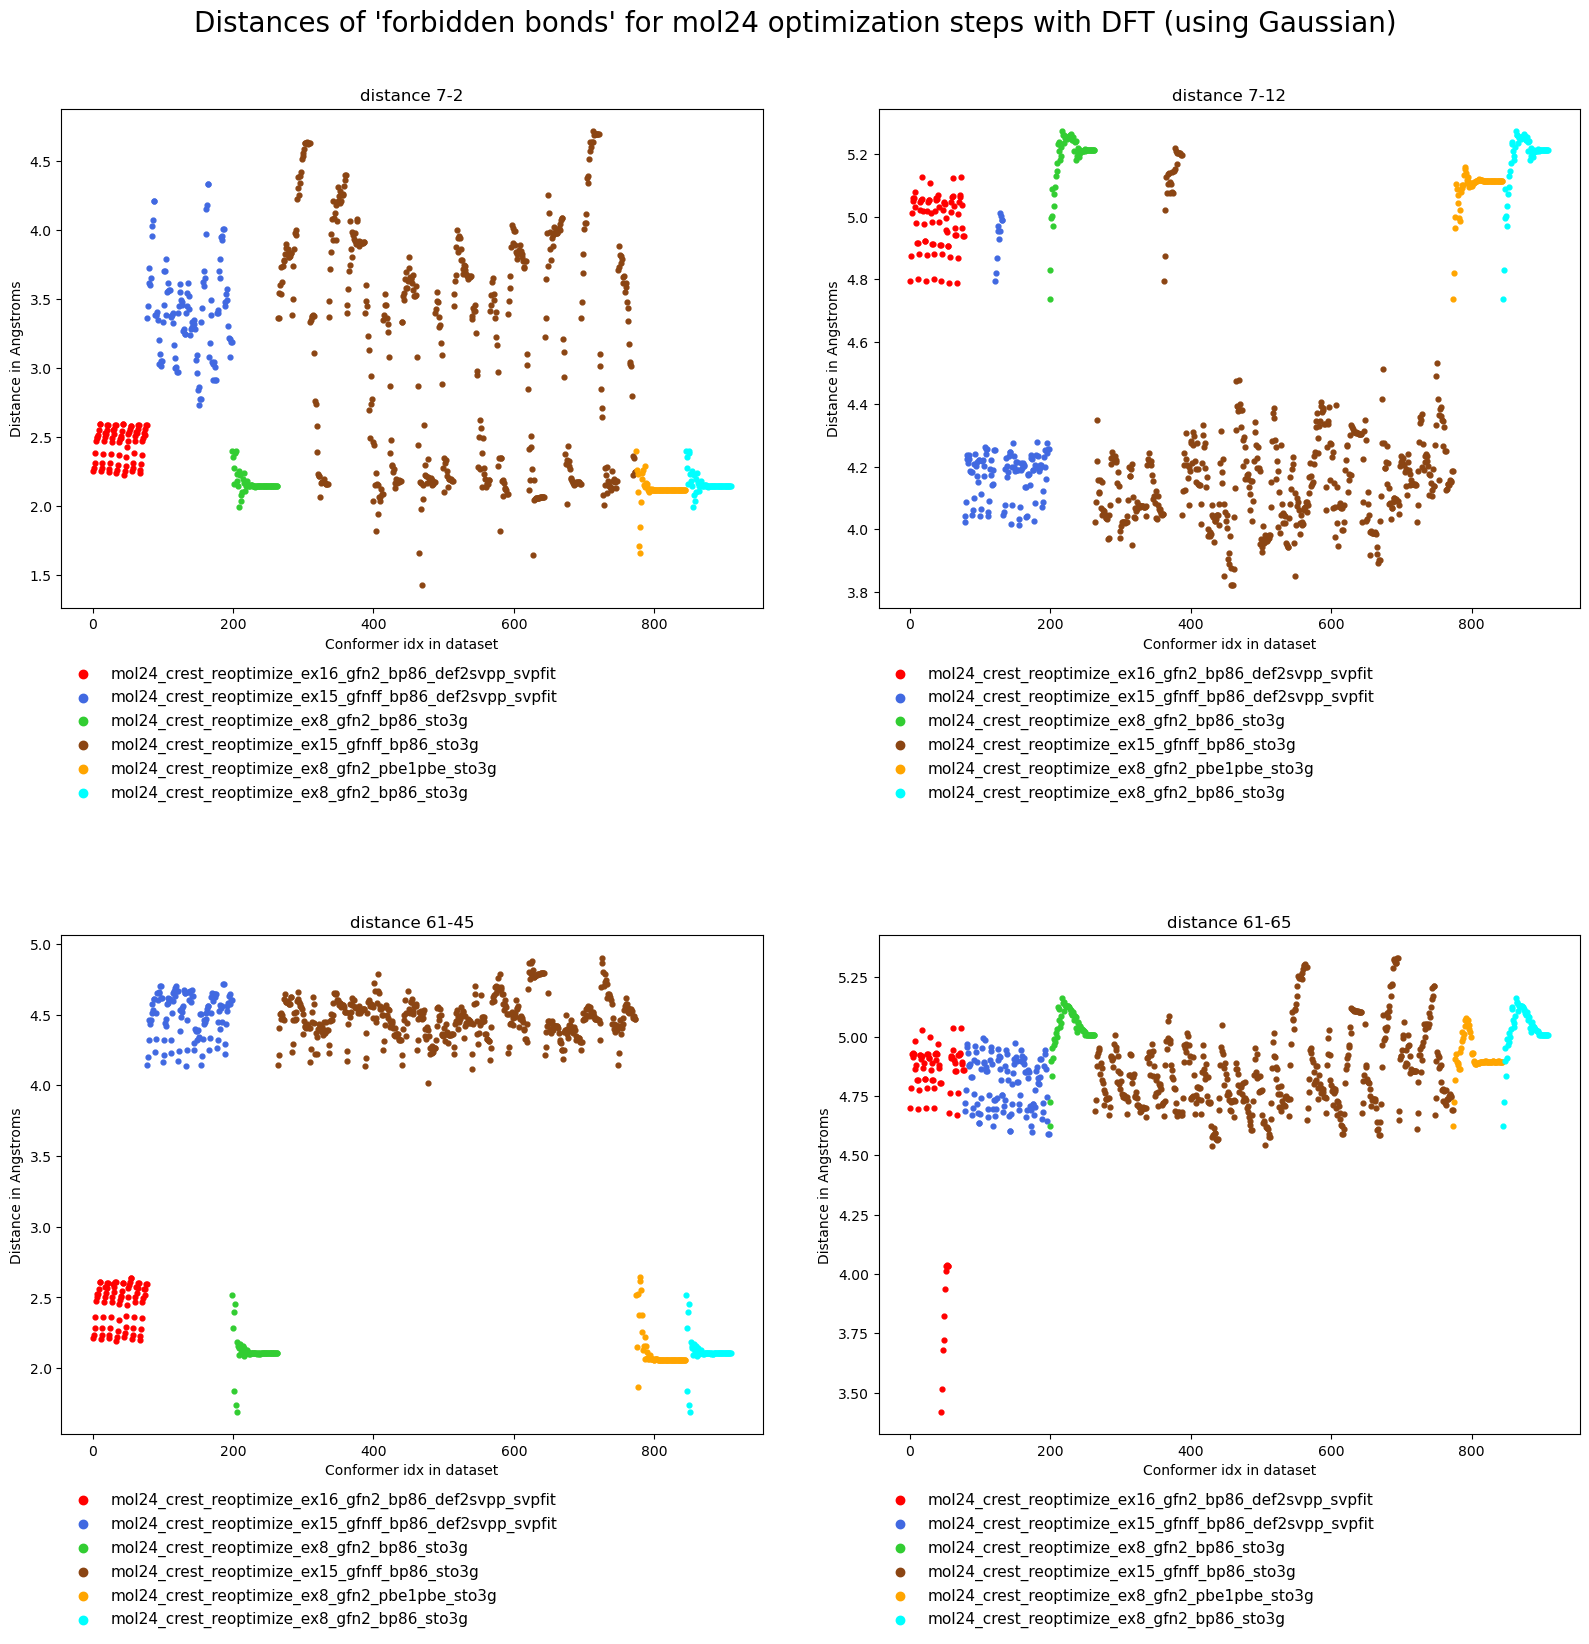

In [12]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = dft_forbidden_distances_results
dataset_names = dft_dataset_names
features_list = forbidden_bonds_list

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Distances of 'forbidden bonds' for mol24 optimization steps with DFT (using Gaussian)"
x_label = "Conformer idx in dataset"
y_label = "Distance in Angstroms"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.4), ncol=1, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()

### 4. Analysis of Ti-O-C angles

#### Ti-O-C angles of CREST conformers

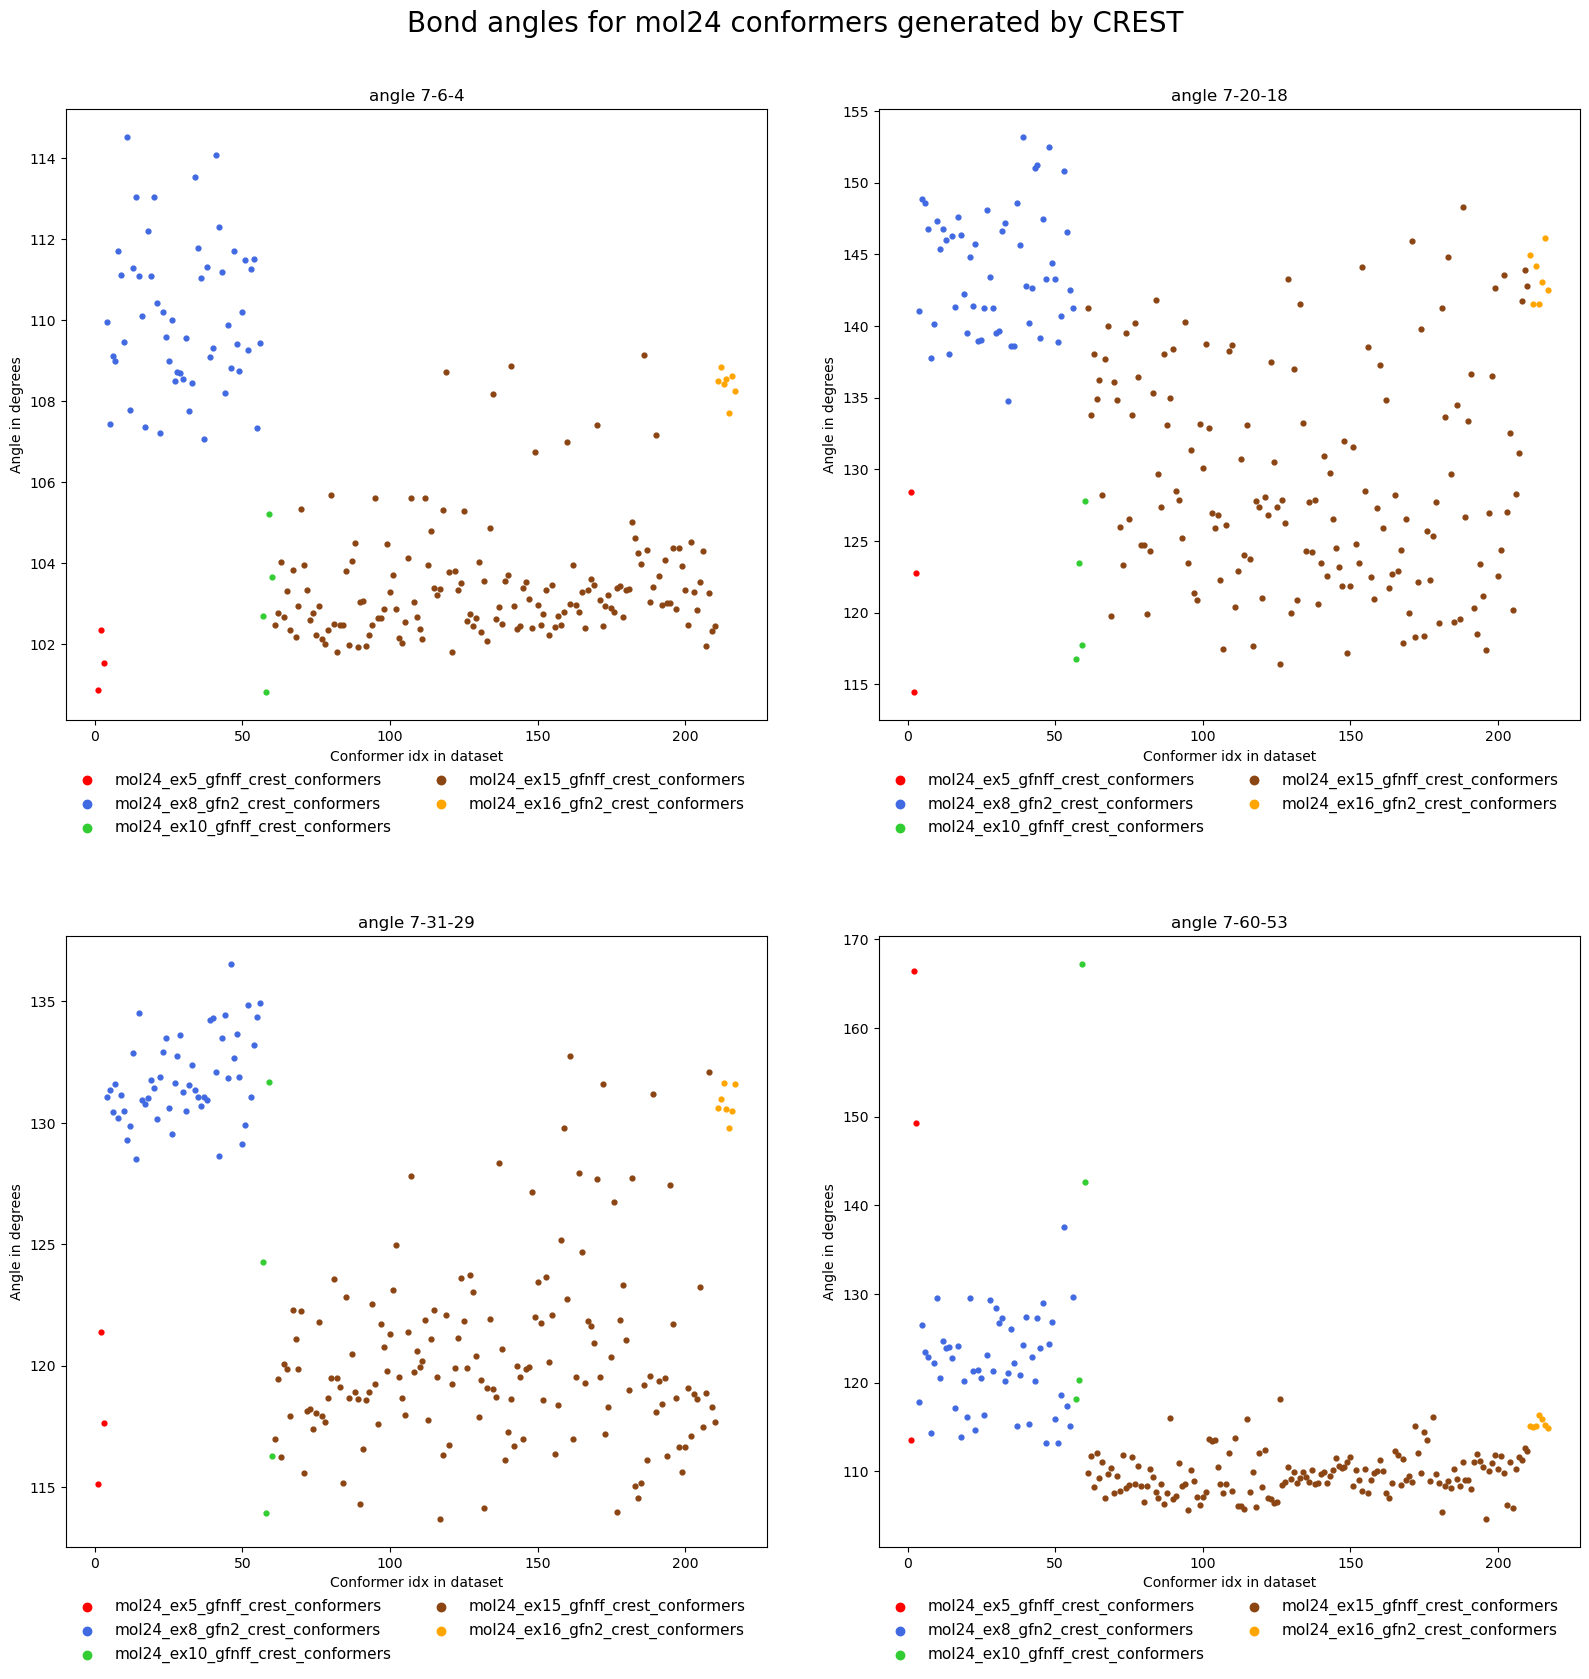

In [17]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = crest_conformers_tioc_angles_results
dataset_names = crest_conformers_dataset_names
features_list = tioc_angles_list

n = 4 # len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Bond angles for mol24 conformers generated by CREST"
x_label = "Conformer idx in dataset"
y_label = "Angle in degrees"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.2), ncol=2, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()


#### Ti-O-C angles with xtb optimization

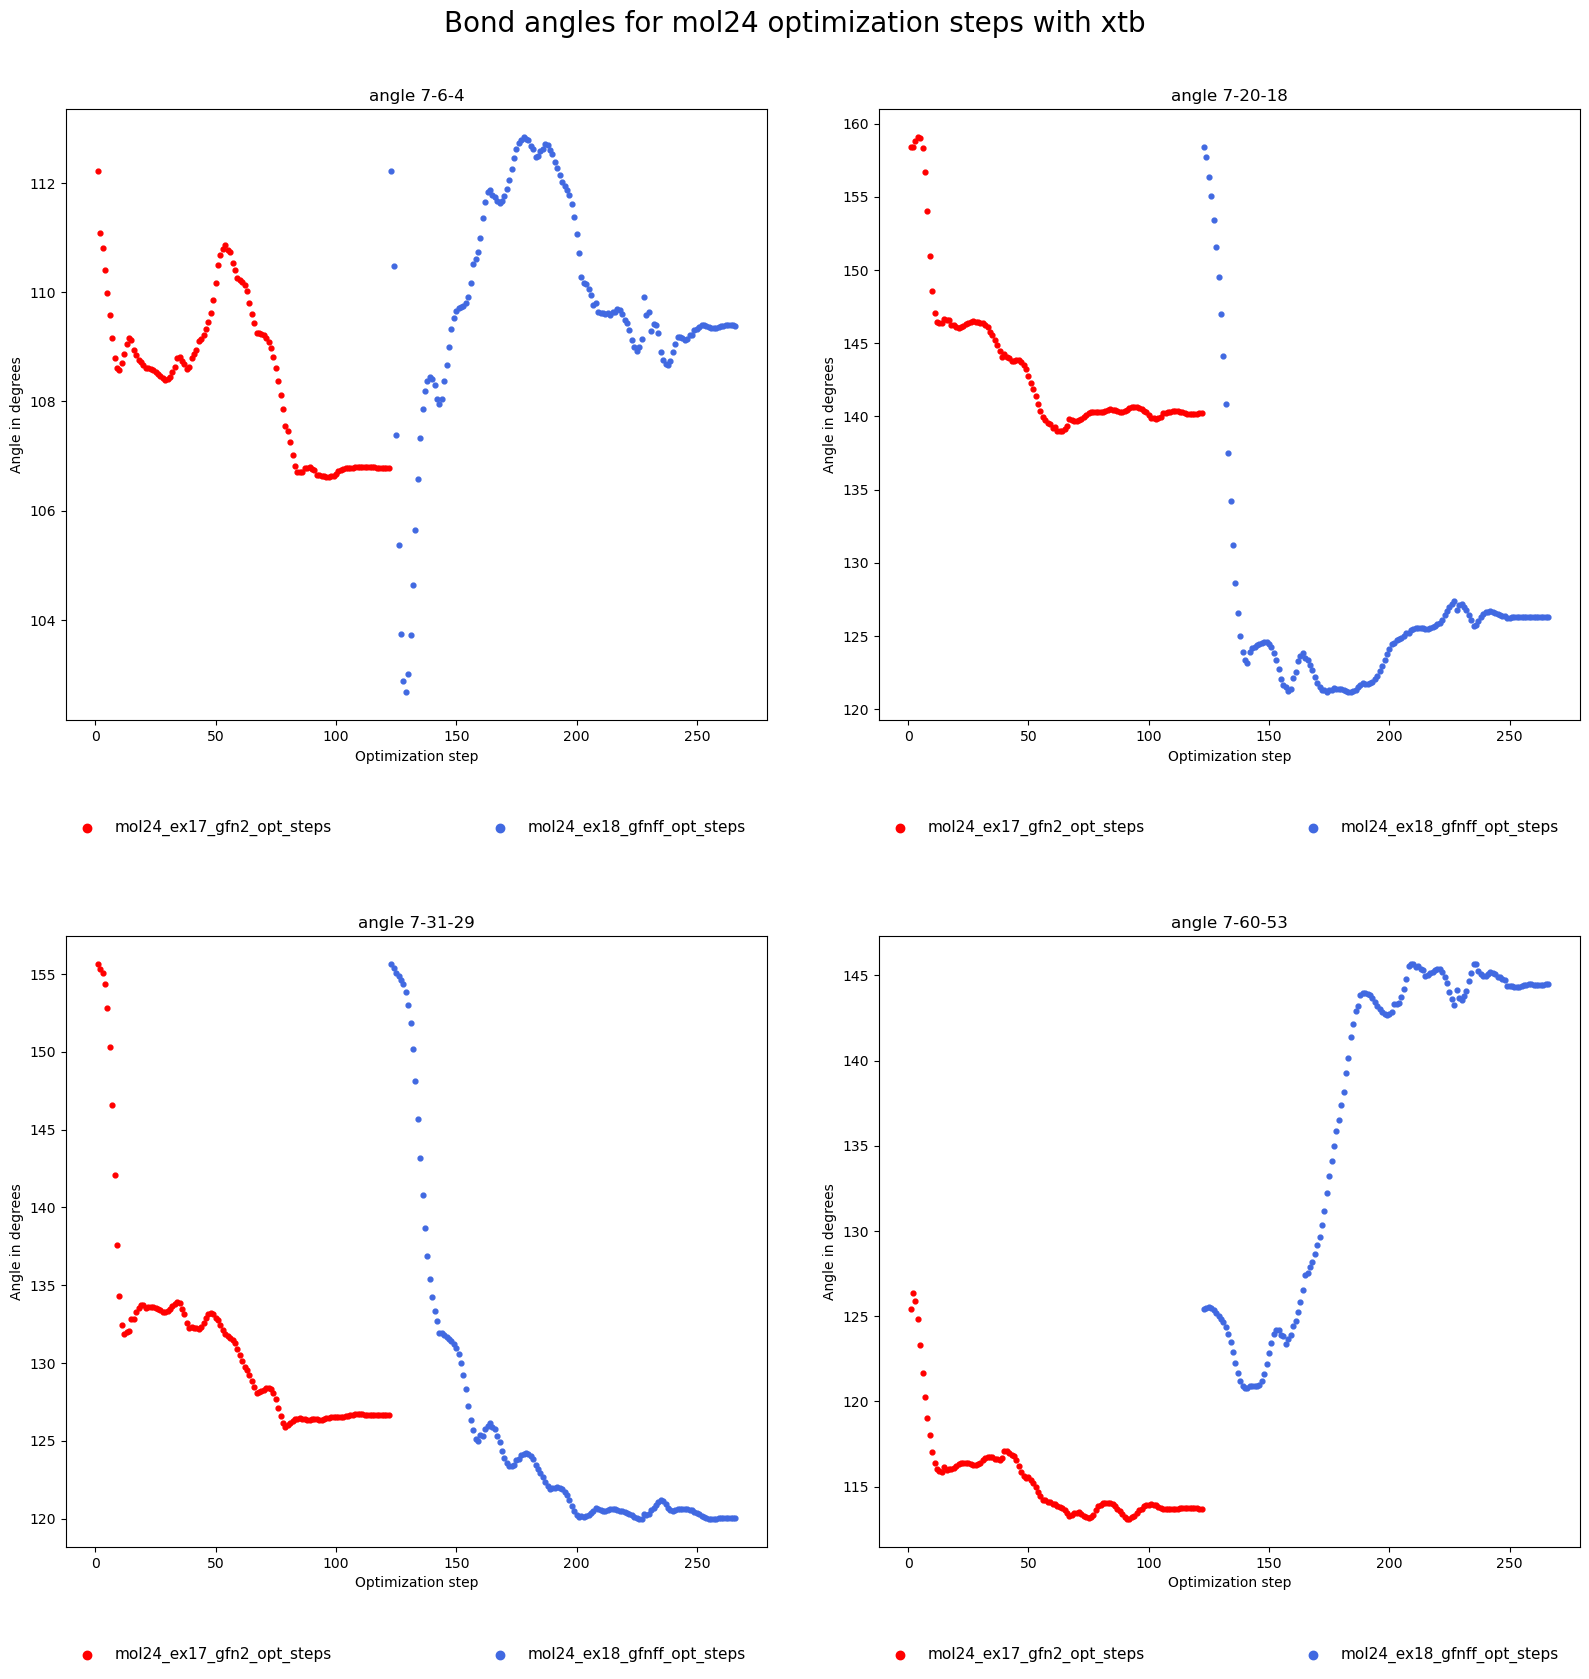

In [18]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = xtb_opt_tioc_angles_results
dataset_names = xtb_opt_dataset_names
features_list = tioc_angles_list

n = 4 # len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Bond angles for mol24 optimization steps with xtb"
x_label = "Optimization step"
y_label = "Angle in degrees"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.2), ncol=2, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()

#### Ti-O-C angles with DFT

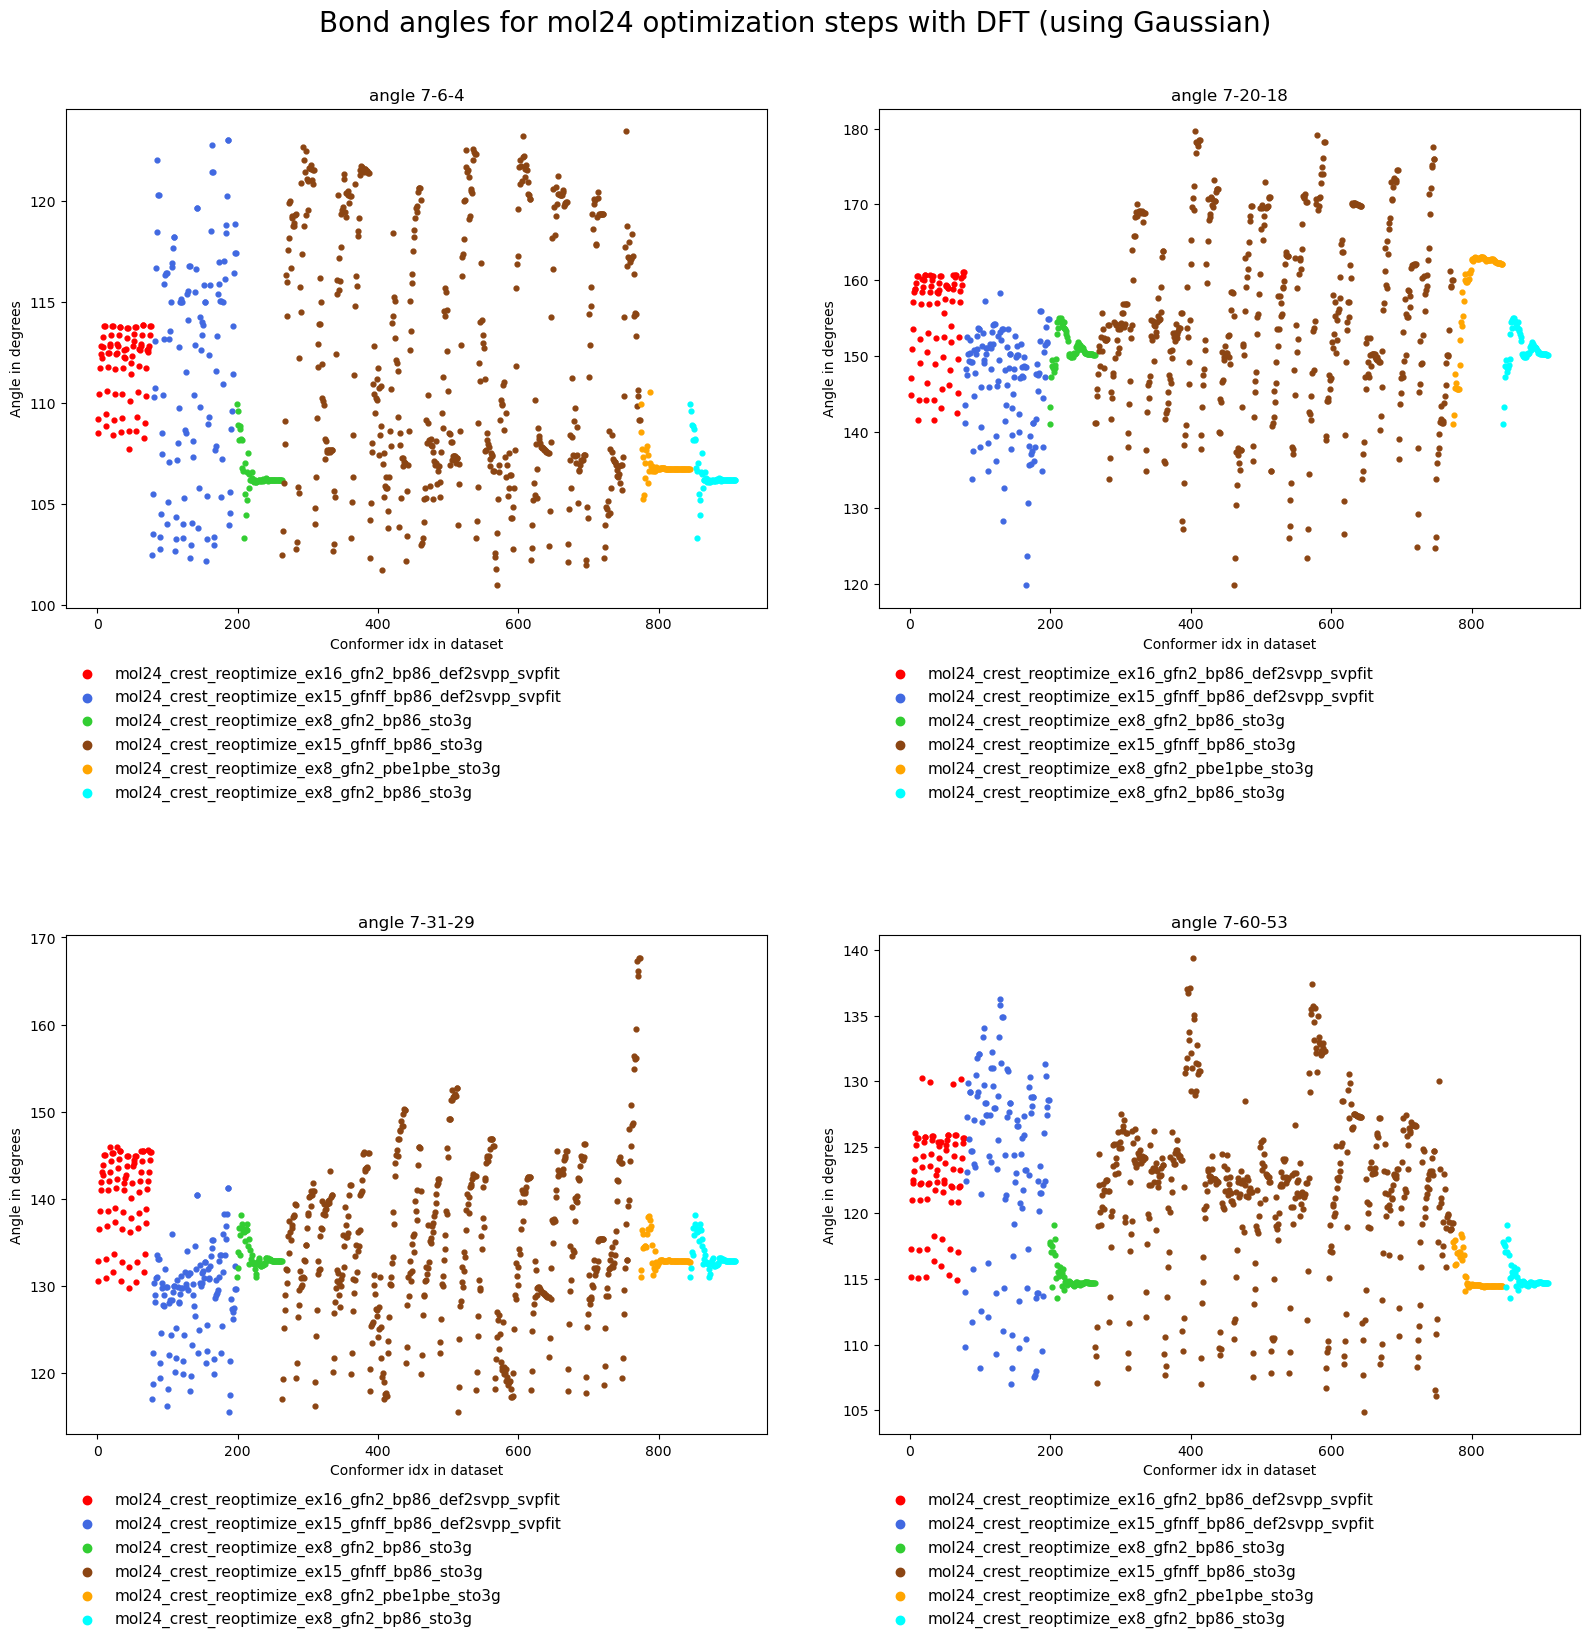

In [19]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

dataset_list_results = dft_tioc_angles_results
dataset_names = dft_dataset_names
features_list = tioc_angles_list

n = 4 #len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Bond angles for mol24 optimization steps with DFT (using Gaussian)"
x_label = "Conformer idx in dataset"
y_label = "Angle in degrees"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.4), ncol=1, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)

plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()

## End

In [ ]:
dset = dc.mol24_crest_conformers
#dset = dc.mol24_xtb_gfn2_opt_steps

dataset_description = dset.description
dataset_sources = dset.names
molecules = au.create_ase_atoms_list_from_dataset(dset)
molecules_names = [x.info["name"] for x in molecules]

features_list = fc.mol24_forbidden_bonds
features_info = [x.get_info(molecules[0]) for x in features_list]

calc_by_features = A.calculate_values_groupby_features(
                                      molecules=molecules,
                                      features_list=features_list
                                      )

calc_by_mols = A.calculate_values_groupby_molecules(
                                      molecules=molecules,
                                      features_list=features_list
                                      )

In [ ]:
data = [x.values for x in calc_by_features]
labels = [x.name for x in calc_by_features]
user_medians = [np.mean(x) for x in data]

plt.title(dataset_description)
plt.boxplot(
              data,
              labels=labels,
              showmeans=True,
              meanline=True,
              vert=False,
              #usermedians=user_medians,
            );


In [ ]:
# https://www.kaggle.com/code/ambrosm/msci-eda-which-makes-sense
#_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

n = len(calc_by_features)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (10, 10)
num_bins = 20
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.hist(data.values, bins=num_bins, density=True)
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()


In [ ]:
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter([i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c='black')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()


In [ ]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "Distances of 'forbidden bonds' for mol24 conformers generated by CREST"
#colours = list(matplotlib.colors.TABLEAU_COLORS.values())
colours = ["red","royalblue","limegreen","saddlebrown","orange","yellow","black","cyan","grey"]
x_label = "Conformer idx in dataset"
y_label = "Distance in Angstroms"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.2), ncol=2, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)
#plt.set_ylabel("Angstrom")
plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()


In [ ]:
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter(data.values, [1 for _ in data.values], s=12, c='black')
    ax.scatter(data.values, [2 for _ in data.values], s=12, c='red')
    ax.scatter(data.values, [3 for _ in data.values], s=12, c='green')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()
